### Import Required Libraries

In [37]:
## import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### Import Dataset

In [38]:
## Importing the data set
dataset = pd.read_csv('bank-full.csv', delimiter=';')




### Show First 10 Rows

In [39]:
# Show first 10 rows
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [40]:
# Show last 10 rows
dataset.tail(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Show Shape of Dataframe

In [41]:
# Show shape and columns
pd.DataFrame({'Shape': [dataset.shape], 'Columns': [dataset.columns.tolist()]})



,Shape,Columns
0,"(45211, 17)","[age, job, marital, education, default, balanc..."


### Show Data Types

In [42]:
# Show data types
pd.DataFrame(dataset.dtypes, columns=['Data Type'])



,Data Type
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


### Show Summary Statistics

In [43]:
# Show summary statistics
dataset.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


### Check for Duplicates & Missing Values

In [44]:
# Check for duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f'Total duplicate rows: {duplicate_count}')
if duplicate_count > 0:
    display(dataset[dataset.duplicated()])

Total duplicate rows: 0


In [45]:
# Check for missing values
dataset.isnull().sum().to_frame('Missing Values')

,Missing Values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


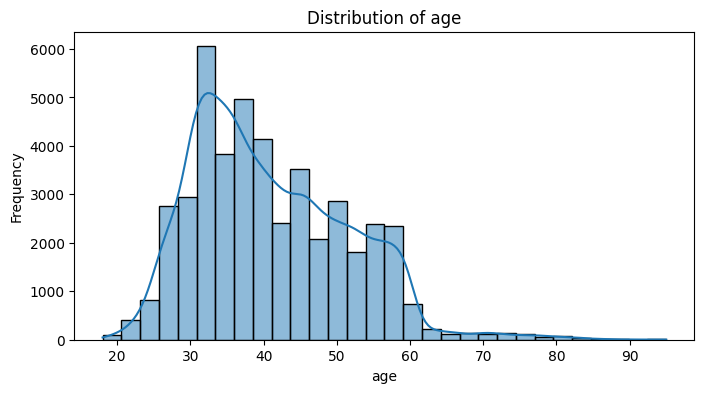

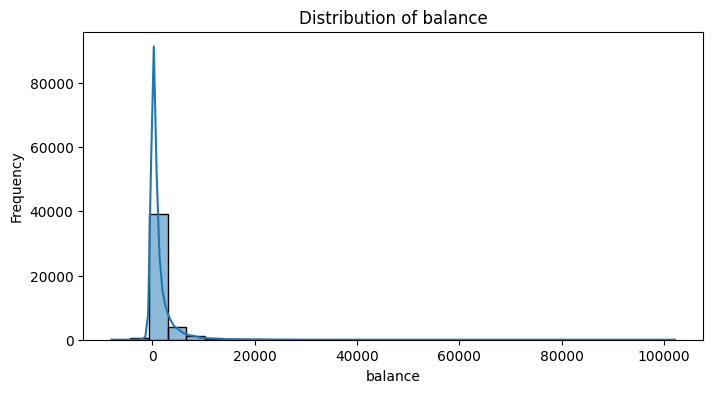

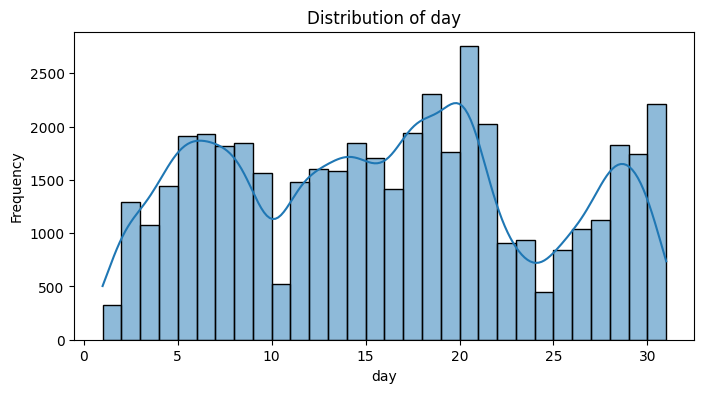

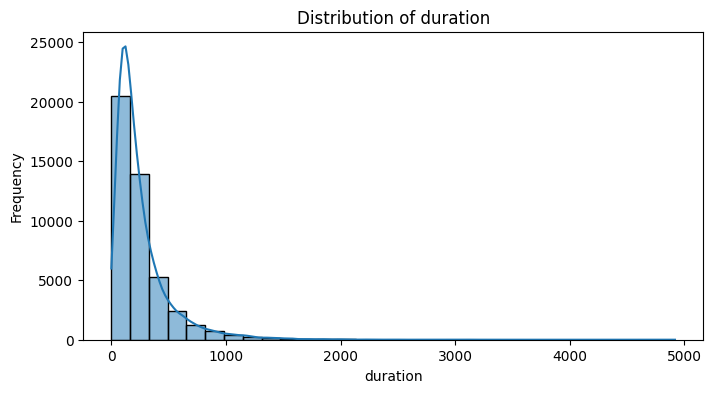

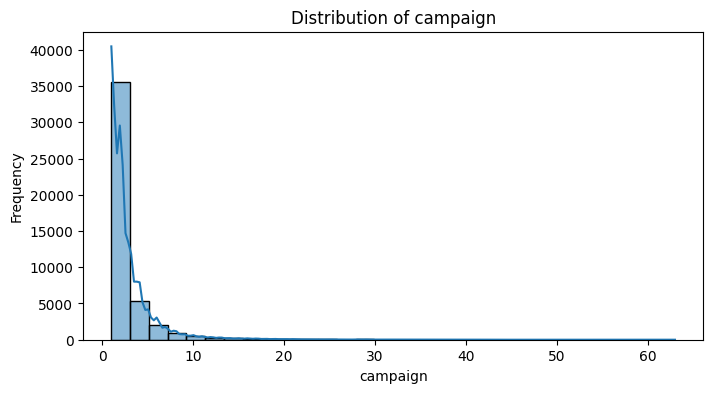

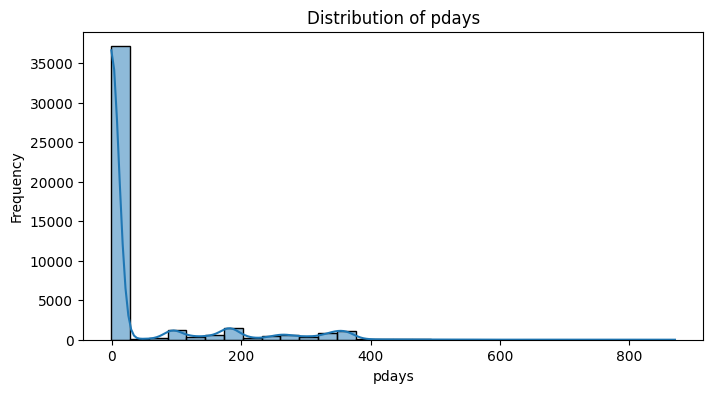

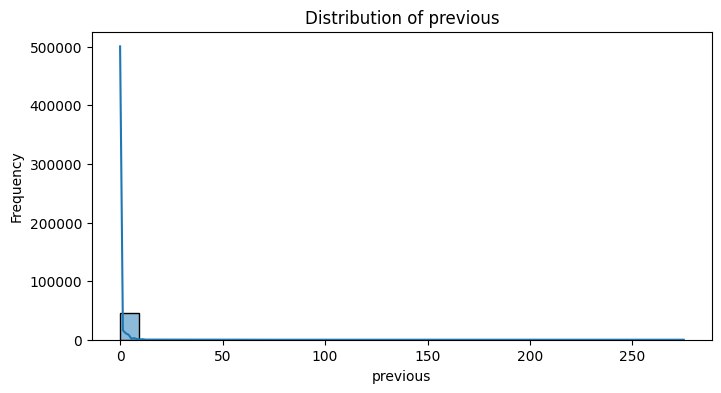

In [46]:
# Analyze distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features distribution
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



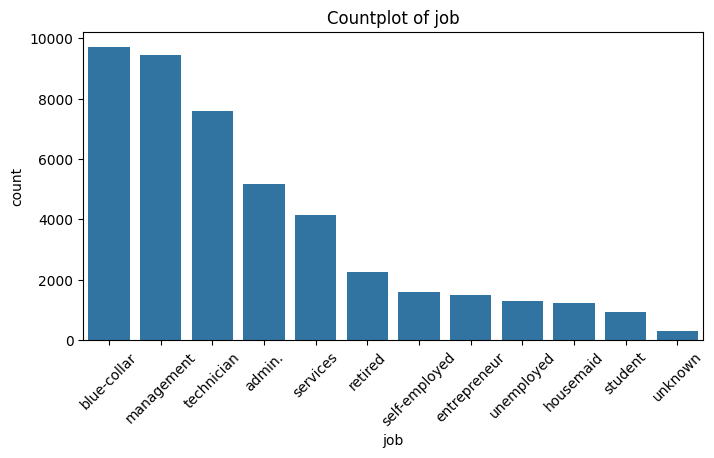

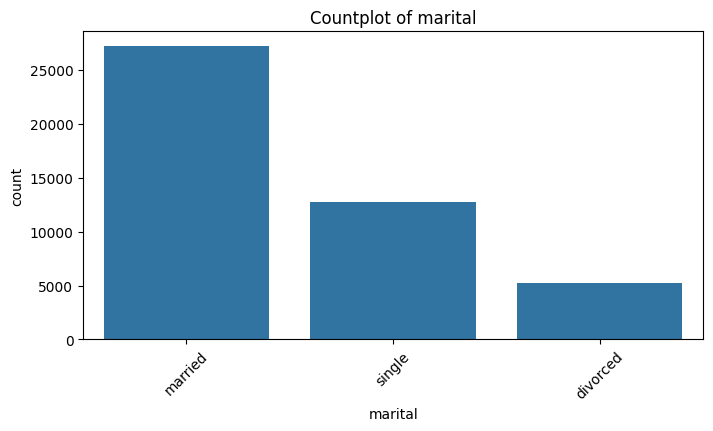

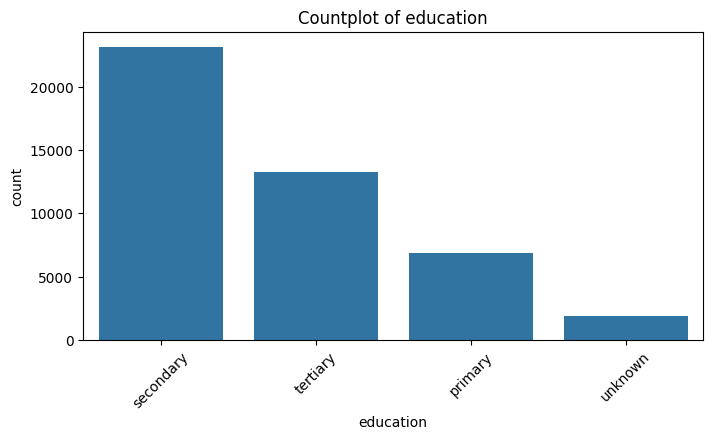

In [47]:
# Categorical features distribution (top 3 by cardinality)
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### # Check for target class imbalance (y variable)

Class counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Class percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


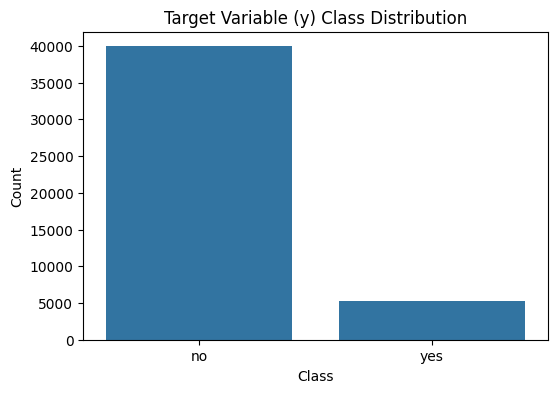

In [48]:

y_counts = dataset['y'].value_counts()
y_percent = dataset['y'].value_counts(normalize=True) * 100
print('Class counts:')
print(y_counts)
print('\nClass percentages:')
print(y_percent)

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=dataset, order=y_counts.index)
plt.title('Target Variable (y) Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Resolve class imbalance

### Chatting the Visualizations

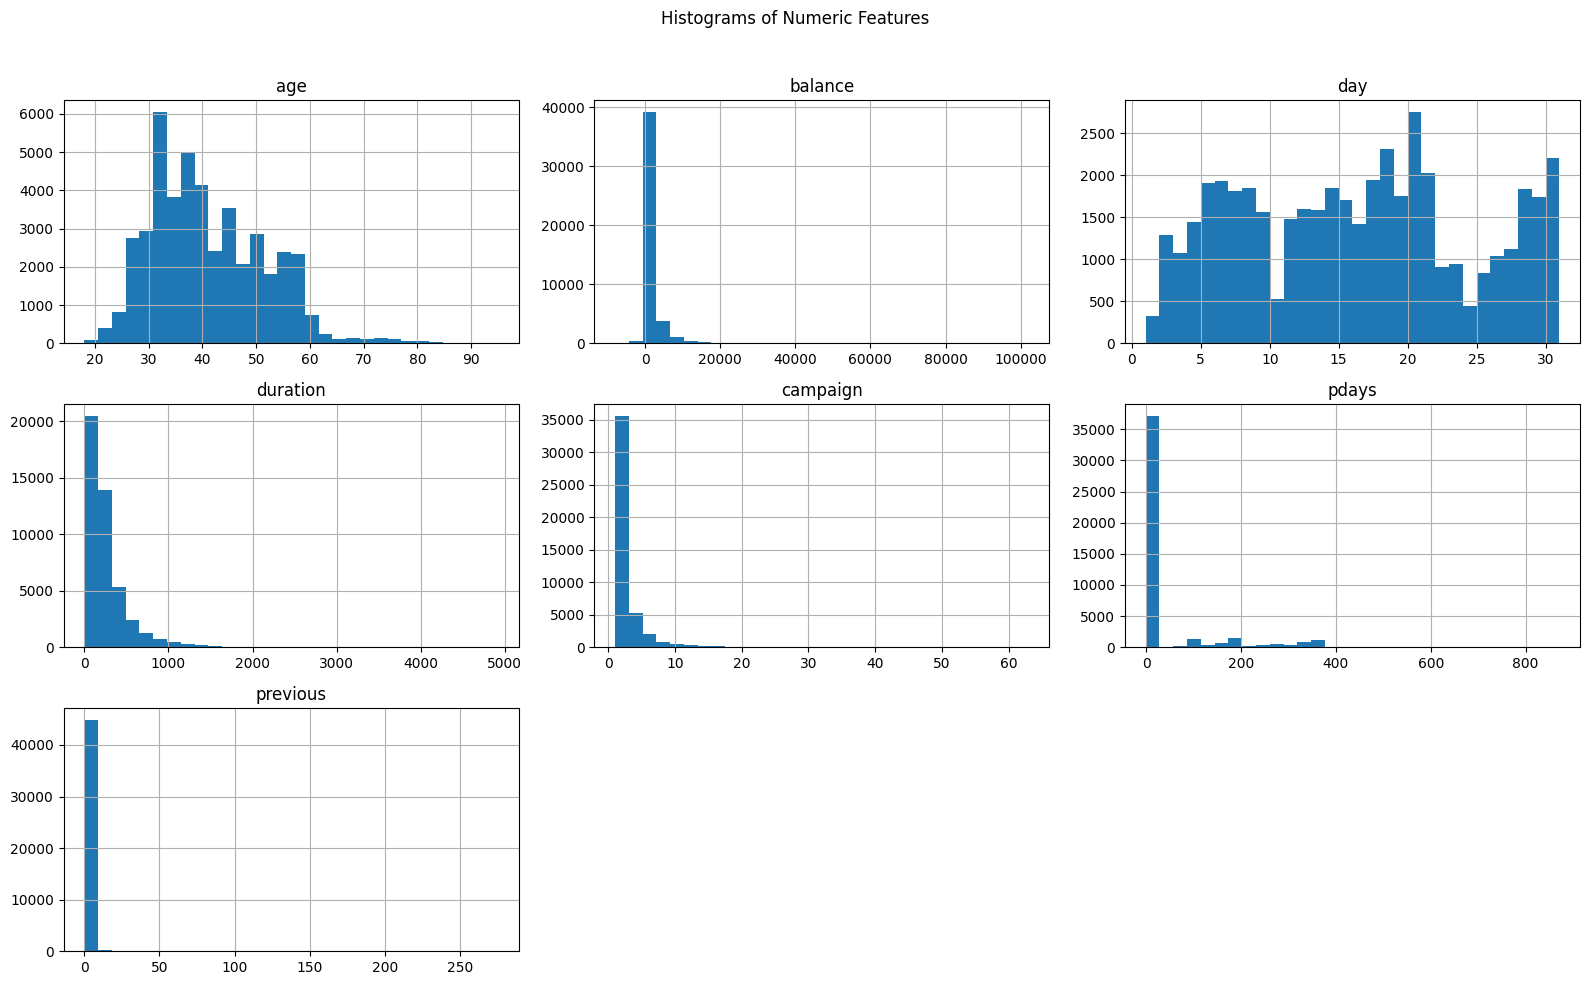

In [49]:
# Summarize insights with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numeric features
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numeric_cols].hist(figsize=(16, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



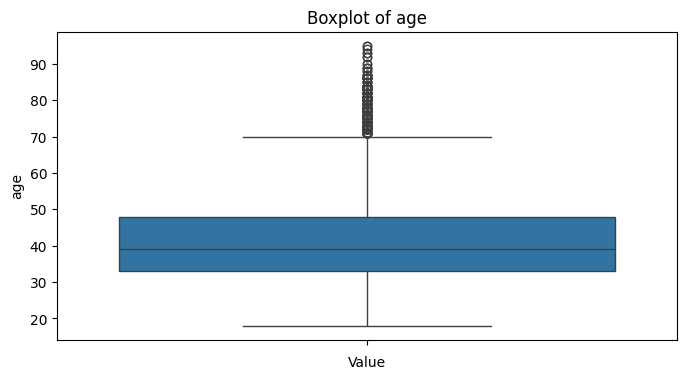

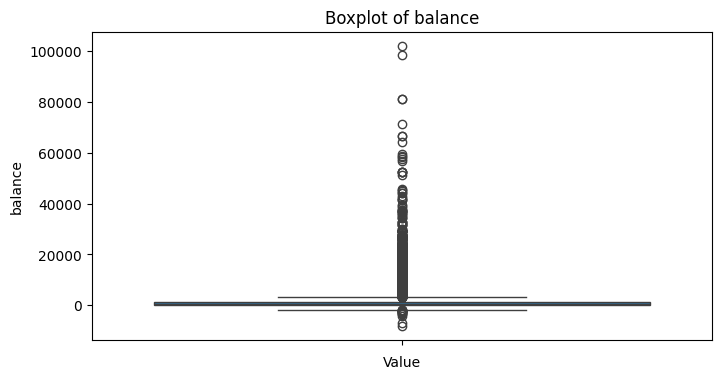

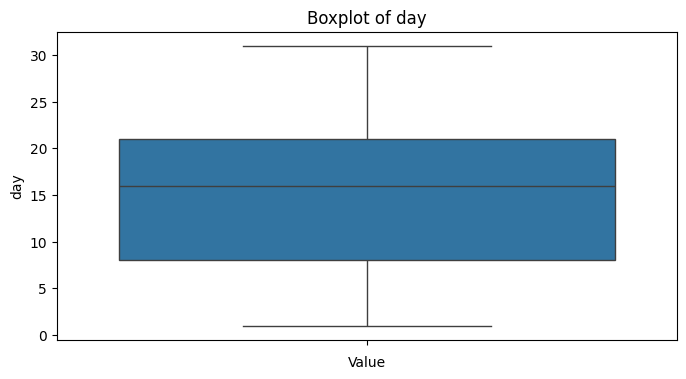

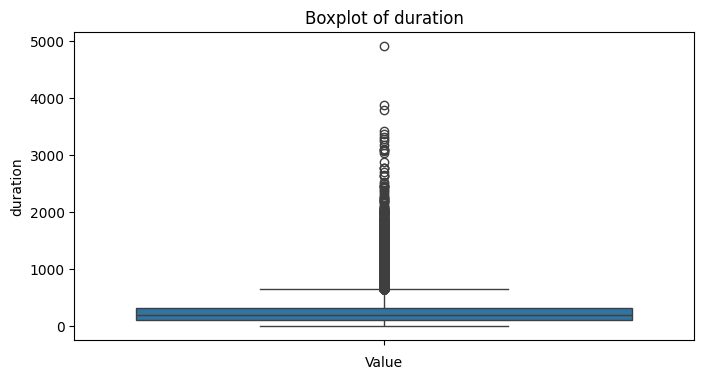

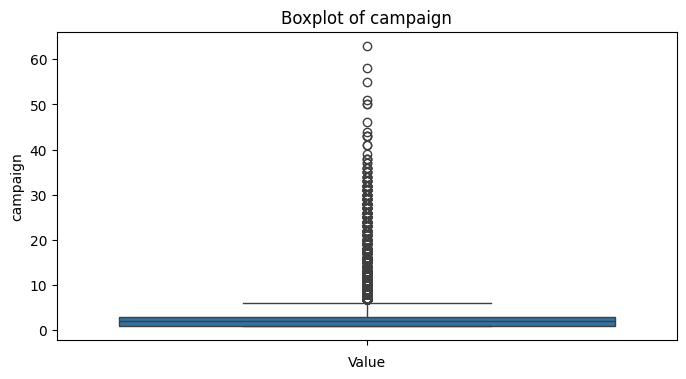

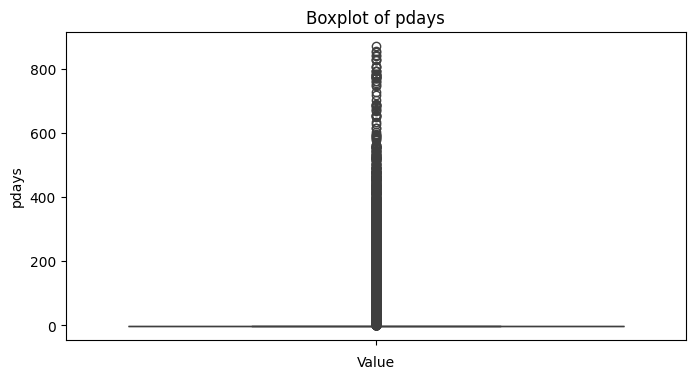

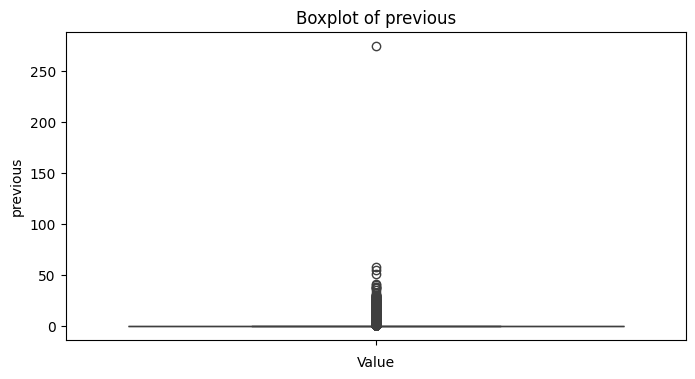

In [50]:
# Boxplots for individual numeric features (vertical, with axis labels and rotated x-axis labels)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')
    plt.xticks(rotation=90)
    plt.show()

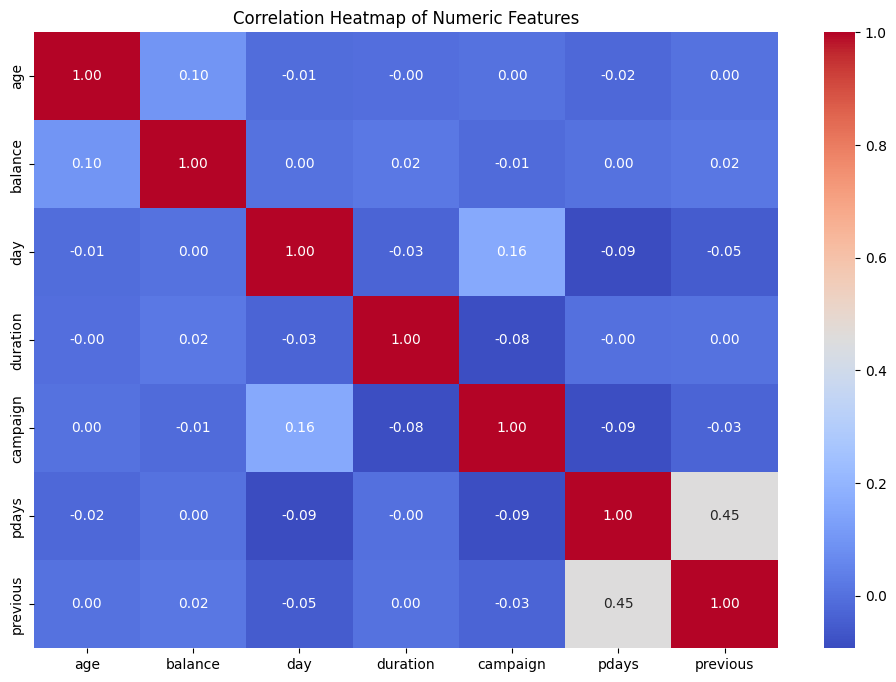

In [51]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = dataset[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Add new Engineered Features

In [52]:
# Feature engineering: create new DataFrame with selected features
df_features = dataset.copy()

# Campaign Intensity: bin campaign into categories
df_features['campaign_intensity'] = pd.cut(df_features['campaign'], bins=[-1, 2, 5, df_features['campaign'].max()], labels=['low', 'medium', 'high'])

# Job/Education Interaction: combine job and education
df_features['job_education'] = df_features['job'] + '_' + df_features['education']

# Marital & Loan/Housing: combine marital status with loan and housing
df_features['married_with_loan'] = ((df_features['marital'] == 'married') & (df_features['loan'] == 'yes')).astype(int)
df_features['single_with_housing'] = ((df_features['marital'] == 'single') & (df_features['housing'] == 'yes')).astype(int)

# Recent Contact: pdays < 30
df_features['recent_contact'] = (df_features['pdays'] < 30).astype(int)

# Show first 5 rows of new DataFrame
df_features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,low,management_tertiary,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,low,technician_secondary,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,low,entrepreneur_secondary,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,low,blue-collar_unknown,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,low,unknown_unknown,0,0,1


### Multicolleneality

In [53]:
# Identify multicollinear features and suggest dropping them
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features from the engineered DataFrame
numeric_df = df_features.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr().abs()
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and corr_matrix.loc[col1, col2] > 0.8]

print('Highly correlated feature pairs (correlation > 0.8):')
for pair in set(tuple(sorted(x)) for x in high_corr_pairs):
    print(pair)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print('\nVariance Inflation Factor (VIF) for each feature:')
print(vif_data)

# Suggest dropping features with VIF > 10
drop_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
print(f'\nSuggested features to drop (VIF > 10): {drop_features}')

# Create new DataFrame with dropped features
df_reduced = df_features.drop(columns=drop_features)
print('\nNew DataFrame shape:', df_reduced.shape)
df_reduced.head()

Highly correlated feature pairs (correlation > 0.8):

Variance Inflation Factor (VIF) for each feature:
    feature       VIF
0       age  5.004058
1   balance  1.212908
2       day  3.984268
3  duration  1.901309
4  campaign  1.824694
5     pdays  1.454202
6  previous  1.341641

Suggested features to drop (VIF > 10): []

New DataFrame shape: (45211, 22)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,low,management_tertiary,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,low,technician_secondary,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,low,entrepreneur_secondary,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,low,blue-collar_unknown,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,low,unknown_unknown,0,0,1


In [54]:
# Move target column 'y' to the end of the DataFrame
def move_target_to_end(df, target_col='y'):
    cols = [col for col in df.columns if col != target_col] + [target_col]
    return df[cols]

df_reduced = move_target_to_end(df_reduced, 'y')
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,low,management_tertiary,0,0,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,low,technician_secondary,0,1,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,low,entrepreneur_secondary,1,0,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,low,blue-collar_unknown,0,0,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,low,unknown_unknown,0,0,1,no


### Skewness of Data

In [55]:
skewness = df_reduced.select_dtypes(include=['int64', 'float64']).skew().to_frame('Skewness')
display(skewness)

,Skewness
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [56]:
# Apply Yeo-Johnson transformation to skewed features with negative values
from sklearn.preprocessing import PowerTransformer

# Identify skewed features (absolute skewness > 0.75)
skewness = df_reduced.select_dtypes(include=['int64', 'float64']).skew()
skewed_feats = skewness[skewness.abs() > 0.75].index.tolist()

df_yeojohnson = df_reduced.copy()
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson[skewed_feats] = pt.fit_transform(df_yeojohnson[skewed_feats])

# Move y to the end column
cols = [c for c in df_yeojohnson.columns if c != 'y'] + ['y']
df_yeojohnson = df_yeojohnson[cols]

# Show first 5 rows of the transformed DataFrame
df_yeojohnson.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,58,management,married,tertiary,no,0.414773,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,management_tertiary,0,0,1,no
1,44,technician,single,secondary,no,-0.410774,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,technician_secondary,0,1,1,no
2,33,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,entrepreneur_secondary,1,0,1,no
3,47,blue-collar,married,unknown,no,0.197685,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,blue-collar_unknown,0,0,1,no
4,33,unknown,single,unknown,no,-0.432119,no,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,unknown_unknown,0,0,1,no


### Scale Numeric Features

In [57]:
# Scale numeric features after Yeo-Johnson transformation
from sklearn.preprocessing import StandardScaler

df_scaled = df_yeojohnson.copy()
numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.drop('y', errors='ignore')

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()

# Show first 5 rows of the scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,1.606965,management,married,tertiary,no,0.414773,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,management_tertiary,0,0,1,no
1,0.288529,technician,single,secondary,no,-0.410774,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,technician_secondary,0,1,1,no
2,-0.747384,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,entrepreneur_secondary,1,0,1,no
3,0.571051,blue-collar,married,unknown,no,0.197685,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,blue-collar_unknown,0,0,1,no
4,-0.747384,unknown,single,unknown,no,-0.432119,no,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,unknown_unknown,0,0,1,no


### Encode Categorical Variables

In [58]:
# Integer encode categorical variables for embeddings, including target 'y'
from sklearn.preprocessing import LabelEncoder

df_encoded = df_scaled.copy()
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Also encode target column 'y' if it is still object type
if df_encoded['y'].dtype == 'object':
    le_y = LabelEncoder()
    df_encoded['y'] = le_y.fit_transform(df_encoded['y'])
    label_encoders['y'] = le_y

# Show first 5 rows of the encoded DataFrame
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,1.606965,4,1,2,0,0.414773,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,18,0,0,1,0
1,0.288529,9,2,1,0,-0.410774,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,37,0,1,1,0
2,-0.747384,2,1,1,0,-0.431122,1,1,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,9,1,0,1,0
3,0.571051,1,1,3,0,0.197685,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,7,0,0,1,0
4,-0.747384,11,2,3,0,-0.432119,0,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,47,0,0,1,0


In [59]:
# Show first 5 rows 
df_encoded.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
45206,0.947747,9,1,2,0,-0.052398,0,0,0,0.143418,...,0.737650,-0.472533,-0.472500,3,2,38,0,0,1,1
45207,2.831227,5,0,0,0,0.275122,0,0,0,0.143418,...,0.134537,-0.472533,-0.472500,3,1,20,0,0,1,1
45208,2.925401,5,1,1,0,1.495765,0,0,0,0.143418,...,1.323745,2.122381,2.166630,2,2,21,0,0,0,1
45209,1.512791,1,1,1,0,-0.114235,0,0,1,0.143418,...,1.091724,-0.472533,-0.472500,3,2,5,0,0,1,0
45210,-0.370689,2,1,1,0,0.681838,0,0,0,0.143418,...,0.134537,2.123051,2.175519,1,1,9,0,0,0,0


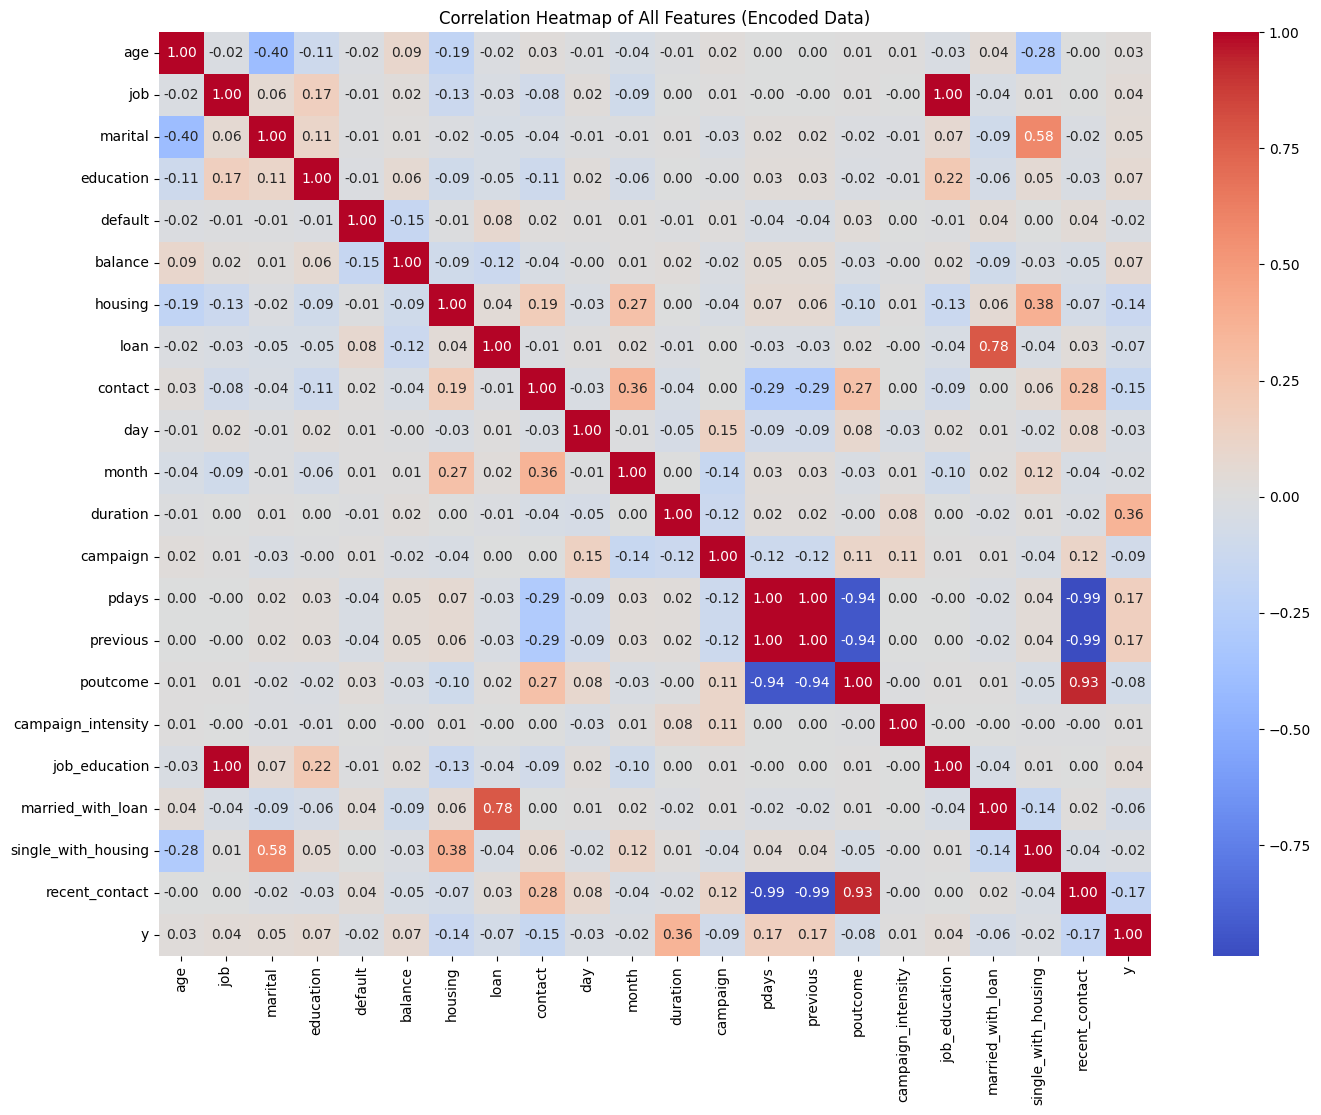

In [60]:
# Correlation heatmap for all features in the encoded training set (including target)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine features and target into one DataFrame for correlation
df_encoded_corr = df_encoded.copy()

plt.figure(figsize=(16, 12))
corr_matrix = df_encoded_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features (Encoded Data)')
plt.show()

In [61]:
# Calculate VIF and drop features with VIF > 10 (using encoded data)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features (excluding target 'y')
numeric_df = df_encoded.drop('y', axis=1).select_dtypes(include=['int64', 'float64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print('Variance Inflation Factor (VIF) for each feature:')
print(vif_data)

# Suggest dropping features with VIF > 10
drop_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
print(f'\nSuggested features to drop (VIF > 10): {drop_features}')

# Create new DataFrame with dropped features
df_encoded_reduced = df_encoded.drop(columns=drop_features)
print('\nNew DataFrame shape:', df_encoded_reduced.shape)
df_encoded_reduced.head()

Variance Inflation Factor (VIF) for each feature:
    feature         VIF
0       age    1.010331
1   balance    1.011891
2       day    1.028493
3  duration    1.017051
4  campaign    1.049007
5     pdays  653.064582
6  previous  652.894022

Suggested features to drop (VIF > 10): ['pdays', 'previous']

New DataFrame shape: (45211, 20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,1.606965,4,1,2,0,0.414773,1,0,2,-1.298476,8,0.386077,-1.108191,3,1,18,0,0,1,0
1,0.288529,9,2,1,0,-0.410774,1,0,2,-1.298476,8,-0.223033,-1.108191,3,1,37,0,1,1,0
2,-0.747384,2,1,1,0,-0.431122,1,1,2,-1.298476,8,-0.923854,-1.108191,3,1,9,1,0,1,0
3,0.571051,1,1,3,0,0.197685,1,0,2,-1.298476,8,-0.735678,-1.108191,3,1,7,0,0,1,0
4,-0.747384,11,2,3,0,-0.432119,0,0,2,-1.298476,8,0.072812,-1.108191,3,1,47,0,0,1,0



### Split dataset into train/val/test with stratification

In [62]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# This gives 60% train, 20% val, 20% test

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (27126, 21) Val: (9042, 21) Test: (9043, 21)


### Resolve class imbalance

In [63]:
# Resolve class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Resampled training set shape:', X_train_resampled.shape, y_train_resampled.shape)

Resampled training set shape: (47906, 21) (47906,)


In [64]:
# Print the number of 'yes' and 'no' samples after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:")
for label, count in zip(unique, counts):
    print(f"{label} ({'yes' if label == 1 else 'no'}): {count}")

Class distribution after SMOTE:
0 (no): 23953
1 (yes): 23953


### Convert into TensorFlow tf.data pipelines

In [65]:
import tensorflow as tf

# Convert train, val, test splits to tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Shuffle and batch datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train_resampled)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Preview a batch
for features, labels in train_dataset.take(1):
    print('Features shape:', features.shape)
    print('Labels shape:', labels.shape)

Features shape: (32, 21)
Labels shape: (32,)
 (32, 21)
Labels shape: (32,)


In [66]:
# Baseline Feedforward Neural Network (FFNN) with ReLU, Dropout, BatchNorm
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use reduced encoded features for training
X_train_nn = X_train_resampled
y_train_nn = y_train_resampled
X_val_nn = X_val.values
y_val_nn = y_val.values
X_test_nn = X_test.values
y_test_nn = y_test.values

input_dim = X_train_nn.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=20, batch_size=32)

# Predict and evaluate on test set
y_pred_prob = model.predict(X_test_nn).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test_nn, y_pred)
prec = precision_score(y_test_nn, y_pred)
rec = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)
auc = roc_auc_score(y_test_nn, y_pred_prob)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test AUC: {auc:.4f}")

Epoch 1/20
1498/1498 [==============================] - 3s 1ms/step - loss: 0.4168 - accuracy: 0.8136 - val_loss: 0.3693 - val_accuracy: 0.8111
Epoch 2/20
1498/1498 [==============================] - 3s 1ms/step - loss: 0.4168 - accuracy: 0.8136 - val_loss: 0.3693 - val_accuracy: 0.8111
Epoch 2/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3731 - accuracy: 0.8387 - val_loss: 0.3671 - val_accuracy: 0.8200
Epoch 3/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3731 - accuracy: 0.8387 - val_loss: 0.3671 - val_accuracy: 0.8200
Epoch 3/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3621 - accuracy: 0.8459 - val_loss: 0.3379 - val_accuracy: 0.8375
Epoch 4/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3621 - accuracy: 0.8459 - val_loss: 0.3379 - val_accuracy: 0.8375
Epoch 4/20
1498/1498 [==============================] - 2s 1ms/step - loss: 0.3568 - accuracy: 0.8486 - val_loss: 0.3981 - val_accuracy:

In [67]:
# Tuned FFNN with regularization, early stopping, and learning rate scheduler
from tensorflow.keras import regularizers, callbacks, optimizers

# Hyperparameters
num_layers = 3
neurons = [128, 64, 32]
dropout_rates = [0.4, 0.3, 0.2]
learning_rate = 0.001
batch_size = 64
l2_lambda = 0.001

input_dim = X_train_nn.shape[1]

model_tuned = models.Sequential()
model_tuned.add(layers.Input(shape=(input_dim,)))
for i in range(num_layers):
    model_tuned.add(layers.Dense(neurons[i], kernel_regularizer=regularizers.l2(l2_lambda)))
    model_tuned.add(layers.BatchNormalization())
    model_tuned.add(layers.ReLU())
    model_tuned.add(layers.Dropout(dropout_rates[i]))
model_tuned.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=learning_rate)
model_tuned.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

history_tuned = model_tuned.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=batch_size,
    callbacks=[early_stop, lr_scheduler]
    )

# Predict and evaluate on test set
y_pred_prob_tuned = model_tuned.predict(X_test_nn).flatten()
y_pred_tuned = (y_pred_prob_tuned > 0.5).astype(int)

acc_tuned = accuracy_score(y_test_nn, y_pred_tuned)
prec_tuned = precision_score(y_test_nn, y_pred_tuned)
rec_tuned = recall_score(y_test_nn, y_pred_tuned)
f1_tuned = f1_score(y_test_nn, y_pred_tuned)
auc_tuned = roc_auc_score(y_test_nn, y_pred_prob_tuned)

print(f"Tuned Test Accuracy: {acc_tuned:.4f}")
print(f"Tuned Test Precision: {prec_tuned:.4f}")
print(f"Tuned Test Recall: {rec_tuned:.4f}")
print(f"Tuned Test F1-score: {f1_tuned:.4f}")
print(f"Tuned Test AUC: {auc_tuned:.4f}")

Epoch 1/50
749/749 [==============================] - 3s 2ms/step - loss: 0.5699 - accuracy: 0.7955 - val_loss: 0.4492 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 3s 2ms/step - loss: 0.5699 - accuracy: 0.7955 - val_loss: 0.4492 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4453 - accuracy: 0.8423 - val_loss: 0.4084 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.4453 - accuracy: 0.8423 - val_loss: 0.4084 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8480 - val_loss: 0.4185 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8480 - val_loss: 0.4185 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 1s 2ms/step - lo

In [68]:
# Train neural network with class weighting and focal loss for improved precision
from tensorflow.keras import layers, models, callbacks, regularizers
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use legacy optimizer to avoid KeyError
from tensorflow.keras.optimizers.legacy import Adam

# Compute class weights for original training labels (before SMOTE)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print('Class weights:', class_weight_dict)

# Model architecture (same as tuned FFNN)
input_dim = X_train_nn.shape[1]
model_weighted = models.Sequential()
model_weighted.add(layers.Input(shape=(input_dim,)))
model_weighted.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
model_weighted.add(layers.BatchNormalization())
model_weighted.add(layers.ReLU())
model_weighted.add(layers.Dropout(0.4))
model_weighted.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)))
model_weighted.add(layers.BatchNormalization())
model_weighted.add(layers.ReLU())
model_weighted.add(layers.Dropout(0.3))
model_weighted.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001)))
model_weighted.add(layers.BatchNormalization())
model_weighted.add(layers.ReLU())
model_weighted.add(layers.Dropout(0.2))
model_weighted.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model_weighted.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

# Train with class weights
history_weighted = model_weighted.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weight_dict
    )

# Predict and evaluate on test set
y_pred_prob_weighted = model_weighted.predict(X_test_nn).flatten()
y_pred_weighted = (y_pred_prob_weighted > 0.5).astype(int)

acc_weighted = accuracy_score(y_test_nn, y_pred_weighted)
prec_weighted = precision_score(y_test_nn, y_pred_weighted)
rec_weighted = recall_score(y_test_nn, y_pred_weighted)
f1_weighted = f1_score(y_test_nn, y_pred_weighted)
auc_weighted = roc_auc_score(y_test_nn, y_pred_prob_weighted)

print(f"Weighted Test Accuracy: {acc_weighted:.4f}")
print(f"Weighted Test Precision: {prec_weighted:.4f}")
print(f"Weighted Test Recall: {rec_weighted:.4f}")
print(f"Weighted Test F1-score: {f1_weighted:.4f}")
print(f"Weighted Test AUC: {auc_weighted:.4f}")



Class weights: {0: 0.5662338746712312, 1: 4.274503624330287}
Epoch 1/50
749/749 [==============================] - 3s 3ms/step - loss: 0.8144 - accuracy: 0.7265 - val_loss: 1.1000 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 3s 3ms/step - loss: 0.8144 - accuracy: 0.7265 - val_loss: 1.1000 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 2s 2ms/step - loss: 0.5930 - accuracy: 0.7709 - val_loss: 1.0251 - val_accuracy: 0.6428 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.5930 - accuracy: 0.7709 - val_loss: 1.0251 - val_accuracy: 0.6428 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7810 - val_loss: 0.9818 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7810 - val_loss: 0.9818 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 4/5

In [69]:
# Focal loss implementation
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = alpha * tf.pow(1. - pt, gamma) * bce
        return tf.reduce_mean(loss)
    return focal_loss_fixed

# Model with focal loss
model_focal = models.Sequential()
model_focal.add(layers.Input(shape=(input_dim,)))
model_focal.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
model_focal.add(layers.BatchNormalization())
model_focal.add(layers.ReLU())
model_focal.add(layers.Dropout(0.4))
model_focal.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)))
model_focal.add(layers.BatchNormalization())
model_focal.add(layers.ReLU())
model_focal.add(layers.Dropout(0.3))
model_focal.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001)))
model_focal.add(layers.BatchNormalization())
model_focal.add(layers.ReLU())
model_focal.add(layers.Dropout(0.2))
model_focal.add(layers.Dense(1, activation='sigmoid'))

optimizer_focal = Adam(learning_rate=0.001)
model_focal.compile(optimizer=optimizer_focal, loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])

history_focal = model_focal.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler]
    )

# Predict and evaluate on test set
y_pred_prob_focal = model_focal.predict(X_test_nn).flatten()
y_pred_focal = (y_pred_prob_focal > 0.5).astype(int)

acc_focal = accuracy_score(y_test_nn, y_pred_focal)
prec_focal = precision_score(y_test_nn, y_pred_focal)
rec_focal = recall_score(y_test_nn, y_pred_focal)
f1_focal = f1_score(y_test_nn, y_pred_focal)
auc_focal = roc_auc_score(y_test_nn, y_pred_prob_focal)

print(f"Focal Loss Test Accuracy: {acc_focal:.4f}")
print(f"Focal Loss Test Precision: {prec_focal:.4f}")
print(f"Focal Loss Test Recall: {rec_focal:.4f}")
print(f"Focal Loss Test F1-score: {f1_focal:.4f}")
print(f"Focal Loss Test AUC: {auc_focal:.4f}")

Epoch 1/50
749/749 [==============================] - 2s 2ms/step - loss: 0.0942 - accuracy: 0.7642 - val_loss: 0.0333 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 2s 2ms/step - loss: 0.0942 - accuracy: 0.7642 - val_loss: 0.0333 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 2/50
749/749 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.8311 - val_loss: 0.0375 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.8311 - val_loss: 0.0375 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 3/50
749/749 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.8344 - val_loss: 0.0262 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.8344 - val_loss: 0.0262 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 4/50
749/749 [==============================] - 2s 2ms/step - lo

### Model Explainability with SHAP
Below is an example of how to use SHAP to interpret the predictions of your trained neural network. This will help you understand which features are most influential for your model's decisions.

4/4 [==============================] - 0s 1ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6532/6532 [==============================] - 4s 673us/step


  1%|          | 1/100 [00:05<09:51,  5.98s/it]

6532/6532 [==============================] - 5s 691us/step


  2%|▏         | 2/100 [00:12<09:54,  6.07s/it]

6532/6532 [==============================] - 4s 660us/step


  3%|▎         | 3/100 [00:18<09:41,  5.99s/it]

6532/6532 [==============================] - 4s 657us/step


  4%|▍         | 4/100 [00:23<09:30,  5.95s/it]

6532/6532 [==============================] - 4s 652us/step


  5%|▌         | 5/100 [00:29<09:21,  5.91s/it]

6532/6532 [==============================] - 5s 690us/step


  6%|▌         | 6/100 [00:35<09:22,  5.98s/it]

6532/6532 [==============================] - 4s 673us/step


  7%|▋         | 7/100 [00:41<09:15,  5.98s/it]

6532/6532 [==============================] - 4s 657us/step


  8%|▊         | 8/100 [00:47<09:06,  5.95s/it]

6532/6532 [==============================] - 4s 653us/step


  9%|▉         | 9/100 [00:53<08:57,  5.91s/it]

6532/6532 [==============================] - 7s 1ms/step


 10%|█         | 10/100 [01:03<10:53,  7.26s/it]

6532/6532 [==============================] - 7s 1ms/step


 11%|█         | 11/100 [01:13<12:05,  8.15s/it]

6532/6532 [==============================] - 23990s 4s/step


 12%|█▏        | 12/100 [6:41:06<178:33:15, 7304.49s/it]

6532/6532 [==============================] - 8s 1ms/step


 13%|█▎        | 13/100 [6:41:16<123:07:26, 5094.78s/it]

6532/6532 [==============================] - 7s 1ms/step


 14%|█▍        | 14/100 [6:41:25<85:00:45, 3558.66s/it] 

6532/6532 [==============================] - 7s 1ms/step


 15%|█▌        | 15/100 [6:41:35<58:46:05, 2489.00s/it]

6532/6532 [==============================] - 8s 1ms/step


 16%|█▌        | 16/100 [6:41:46<40:39:59, 1742.85s/it]

6532/6532 [==============================] - 9s 1ms/step


 17%|█▋        | 17/100 [6:41:57<28:10:40, 1222.17s/it]

6532/6532 [==============================] - 7s 1ms/step


 18%|█▊        | 18/100 [6:42:07<19:32:33, 857.97s/it] 

6532/6532 [==============================] - 9s 1ms/step


 19%|█▉        | 19/100 [6:42:19<13:35:08, 603.81s/it]

6532/6532 [==============================] - 9s 1ms/step


 20%|██        | 20/100 [6:42:30<9:28:03, 426.04s/it] 

6532/6532 [==============================] - 9s 1ms/step


 21%|██        | 21/100 [6:42:42<6:37:07, 301.62s/it]

6532/6532 [==============================] - 8s 1ms/step


 22%|██▏       | 22/100 [6:42:53<4:38:53, 214.54s/it]

6532/6532 [==============================] - 9s 1ms/step


 23%|██▎       | 23/100 [6:43:05<3:17:05, 153.58s/it]

6532/6532 [==============================] - 9s 1ms/step


 24%|██▍       | 24/100 [6:43:16<2:20:32, 110.95s/it]

6532/6532 [==============================] - 9s 1ms/step


 25%|██▌       | 25/100 [6:43:28<1:41:21, 81.09s/it] 

6532/6532 [==============================] - 9s 1ms/step


 26%|██▌       | 26/100 [6:43:40<1:14:21, 60.29s/it]

6532/6532 [==============================] - 9s 1ms/step


 27%|██▋       | 27/100 [6:43:51<55:31, 45.64s/it]  

6532/6532 [==============================] - 9s 1ms/step


 28%|██▊       | 28/100 [6:44:03<42:37, 35.52s/it]

6532/6532 [==============================] - 7s 1ms/step


 29%|██▉       | 29/100 [6:44:12<32:38, 27.58s/it]

6532/6532 [==============================] - 7s 1ms/step


 30%|███       | 30/100 [6:44:21<25:40, 22.01s/it]

6532/6532 [==============================] - 6s 974us/step


 31%|███       | 31/100 [6:44:30<20:40, 17.97s/it]

6532/6532 [==============================] - 7s 1ms/step


 32%|███▏      | 32/100 [6:44:39<17:29, 15.44s/it]

6532/6532 [==============================] - 9s 1ms/step


 33%|███▎      | 33/100 [6:44:50<15:53, 14.23s/it]

6532/6532 [==============================] - 9s 1ms/step


 34%|███▍      | 34/100 [6:45:02<14:47, 13.44s/it]

6532/6532 [==============================] - 8s 1ms/step


 35%|███▌      | 35/100 [6:45:13<13:53, 12.83s/it]

6532/6532 [==============================] - 9s 1ms/step


 36%|███▌      | 36/100 [6:45:25<13:15, 12.44s/it]

6532/6532 [==============================] - 8s 1ms/step


 37%|███▋      | 37/100 [6:45:36<12:36, 12.01s/it]

6532/6532 [==============================] - 9s 1ms/step


 38%|███▊      | 38/100 [6:45:48<12:17, 11.90s/it]

6532/6532 [==============================] - 9s 1ms/step


 39%|███▉      | 39/100 [6:45:59<12:02, 11.84s/it]

6532/6532 [==============================] - 8s 1ms/step


 40%|████      | 40/100 [6:46:11<11:39, 11.66s/it]

6532/6532 [==============================] - 9s 1ms/step


 41%|████      | 41/100 [6:46:22<11:27, 11.66s/it]

6532/6532 [==============================] - 9s 1ms/step


 42%|████▏     | 42/100 [6:46:34<11:16, 11.66s/it]

6532/6532 [==============================] - 8s 1ms/step


 43%|████▎     | 43/100 [6:46:45<10:59, 11.57s/it]

6532/6532 [==============================] - 9s 1ms/step


 44%|████▍     | 44/100 [6:46:57<10:52, 11.64s/it]

6532/6532 [==============================] - 9s 1ms/step


 45%|████▌     | 45/100 [6:47:08<10:33, 11.52s/it]

6532/6532 [==============================] - 7s 993us/step


 46%|████▌     | 46/100 [6:47:17<09:36, 10.68s/it]

6532/6532 [==============================] - 7s 999us/step


 47%|████▋     | 47/100 [6:47:26<09:01, 10.21s/it]

6532/6532 [==============================] - 6s 981us/step


 48%|████▊     | 48/100 [6:47:35<08:27,  9.76s/it]

6532/6532 [==============================] - 8s 1ms/step


 49%|████▉     | 49/100 [6:47:45<08:30, 10.00s/it]

6532/6532 [==============================] - 9s 1ms/step


 50%|█████     | 50/100 [6:47:57<08:44, 10.49s/it]

6532/6532 [==============================] - 9s 1ms/step


 51%|█████     | 51/100 [6:48:09<08:50, 10.82s/it]

6532/6532 [==============================] - 9s 1ms/step


 52%|█████▏    | 52/100 [6:48:20<08:49, 11.03s/it]

6532/6532 [==============================] - 9s 1ms/step


 53%|█████▎    | 53/100 [6:48:32<08:44, 11.16s/it]

6532/6532 [==============================] - 9s 1ms/step


 54%|█████▍    | 54/100 [6:48:43<08:33, 11.17s/it]

6532/6532 [==============================] - 8s 1ms/step


 55%|█████▌    | 55/100 [6:55:05<1:31:54, 122.55s/it]

6532/6532 [==============================] - 9s 1ms/step


 56%|█████▌    | 56/100 [6:55:17<1:05:31, 89.35s/it] 

6532/6532 [==============================] - 7s 1ms/step


 57%|█████▋    | 57/100 [6:55:26<46:44, 65.22s/it]  

6532/6532 [==============================] - 7s 992us/step


 58%|█████▊    | 58/100 [6:55:35<33:47, 48.27s/it]

6532/6532 [==============================] - 6s 989us/step


 59%|█████▉    | 59/100 [6:55:44<24:52, 36.40s/it]

6532/6532 [==============================] - 8s 1ms/step


 60%|██████    | 60/100 [6:55:54<19:06, 28.67s/it]

6532/6532 [==============================] - 8s 1ms/step


 61%|██████    | 61/100 [6:56:05<15:10, 23.34s/it]

6532/6532 [==============================] - 8s 1ms/step


 62%|██████▏   | 62/100 [6:56:16<12:22, 19.55s/it]

6532/6532 [==============================] - 8s 1ms/step


 63%|██████▎   | 63/100 [6:56:26<10:25, 16.90s/it]

6532/6532 [==============================] - 8s 1ms/step


 64%|██████▍   | 64/100 [6:56:38<09:09, 15.25s/it]

6532/6532 [==============================] - 8s 1ms/step


 65%|██████▌   | 65/100 [6:56:49<08:13, 14.09s/it]

6532/6532 [==============================] - 8s 1ms/step


 66%|██████▌   | 66/100 [6:57:00<07:27, 13.17s/it]

6532/6532 [==============================] - 9s 1ms/step


 67%|██████▋   | 67/100 [6:57:12<07:00, 12.74s/it]

6532/6532 [==============================] - 8s 1ms/step


 68%|██████▊   | 68/100 [6:57:23<06:30, 12.20s/it]

6532/6532 [==============================] - 8s 1ms/step


 69%|██████▉   | 69/100 [6:57:34<06:07, 11.86s/it]

6532/6532 [==============================] - 9s 1ms/step


 70%|███████   | 70/100 [6:57:46<05:56, 11.87s/it]

6532/6532 [==============================] - 9s 1ms/step


 71%|███████   | 71/100 [6:57:57<05:39, 11.72s/it]

6532/6532 [==============================] - 9s 1ms/step


 72%|███████▏  | 72/100 [6:58:09<05:30, 11.81s/it]

6532/6532 [==============================] - 7s 1ms/step


 73%|███████▎  | 73/100 [6:58:19<04:58, 11.04s/it]

6532/6532 [==============================] - 7s 1ms/step


 74%|███████▍  | 74/100 [6:58:28<04:30, 10.41s/it]

6532/6532 [==============================] - 7s 997us/step


 75%|███████▌  | 75/100 [6:58:36<04:07,  9.92s/it]

6532/6532 [==============================] - 6s 989us/step


 76%|███████▌  | 76/100 [6:58:46<03:53,  9.73s/it]

6532/6532 [==============================] - 8s 1ms/step


 77%|███████▋  | 77/100 [6:58:57<03:54, 10.19s/it]

6532/6532 [==============================] - 9s 1ms/step


 78%|███████▊  | 78/100 [6:59:08<03:52, 10.58s/it]

6532/6532 [==============================] - 8s 1ms/step


 79%|███████▉  | 79/100 [6:59:19<03:44, 10.67s/it]

6532/6532 [==============================] - 9s 1ms/step


 80%|████████  | 80/100 [6:59:31<03:40, 11.02s/it]

6532/6532 [==============================] - 8s 1ms/step


 81%|████████  | 81/100 [6:59:42<03:30, 11.06s/it]

6532/6532 [==============================] - 8s 1ms/step


 82%|████████▏ | 82/100 [6:59:53<03:19, 11.07s/it]

6532/6532 [==============================] - 9s 1ms/step


 83%|████████▎ | 83/100 [7:00:05<03:10, 11.21s/it]

6532/6532 [==============================] - 9s 1ms/step


 84%|████████▍ | 84/100 [7:00:16<03:01, 11.32s/it]

6532/6532 [==============================] - 9s 1ms/step


 85%|████████▌ | 85/100 [7:00:28<02:51, 11.41s/it]

6532/6532 [==============================] - 9s 1ms/step


 86%|████████▌ | 86/100 [7:00:40<02:41, 11.51s/it]

6532/6532 [==============================] - 8s 1ms/step


 87%|████████▋ | 87/100 [7:00:50<02:26, 11.26s/it]

6532/6532 [==============================] - 8s 1ms/step


 88%|████████▊ | 88/100 [7:01:02<02:14, 11.22s/it]

6532/6532 [==============================] - 9s 1ms/step


 89%|████████▉ | 89/100 [7:01:13<02:04, 11.30s/it]

6532/6532 [==============================] - 7s 1ms/step


 90%|█████████ | 90/100 [7:01:22<01:46, 10.61s/it]

6532/6532 [==============================] - 7s 1ms/step


 91%|█████████ | 91/100 [7:01:31<01:31, 10.15s/it]

6532/6532 [==============================] - 7s 1ms/step


 92%|█████████▏| 92/100 [7:01:40<01:18,  9.78s/it]

6532/6532 [==============================] - 7s 1ms/step


 93%|█████████▎| 93/100 [7:01:50<01:09,  9.89s/it]

6532/6532 [==============================] - 8s 1ms/step


 94%|█████████▍| 94/100 [7:02:01<01:01, 10.28s/it]

6532/6532 [==============================] - 8s 1ms/step


 95%|█████████▌| 95/100 [7:02:12<00:52, 10.53s/it]

6532/6532 [==============================] - 8s 1ms/step


 96%|█████████▌| 96/100 [7:02:23<00:42, 10.59s/it]

6532/6532 [==============================] - 8s 1ms/step


 97%|█████████▋| 97/100 [7:02:34<00:32, 10.71s/it]

6532/6532 [==============================] - 8s 1ms/step


 98%|█████████▊| 98/100 [7:02:45<00:21, 10.83s/it]

6532/6532 [==============================] - 8s 1ms/step


 99%|█████████▉| 99/100 [7:02:56<00:10, 10.75s/it]

6532/6532 [==============================] - 8s 1ms/step


100%|██████████| 100/100 [7:03:07<00:00, 253.88s/it]



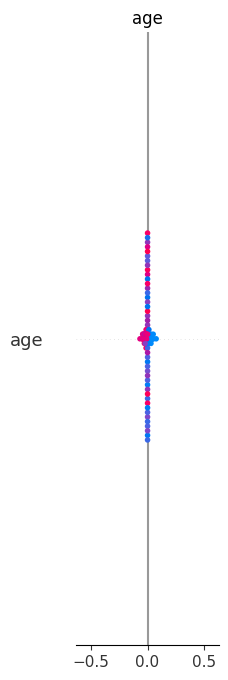

In [70]:
# SHAP explainability for a sample of the test set (faster)
import shap
shap.initjs()

# Use a random sample of 100 rows from the test set for faster computation
sample_size = min(100, X_test_nn.shape[0])
X_test_sample = X_test_nn[:sample_size]  # or use .sample(n=sample_size, random_state=42) if X_test_nn is a DataFrame

# Use the trained model and the full feature set for SHAP
explainer = shap.KernelExplainer(model.predict, X_train_nn[:sample_size])
shap_values = explainer.shap_values(X_test_sample)

# Summary plot for all features (on the sample)
import pandas as pd
X_test_sample_df = pd.DataFrame(X_test_sample, columns=X_train.columns)
shap.summary_plot(shap_values, X_test_sample_df)

In [71]:
# Save the trained focal loss model
model_focal.save('focal_model.h5')

# Save the fitted scaler
import joblib
joblib.dump(scaler, 'scaler.joblib')

# Save the fitted label encoders (dictionary)
joblib.dump(label_encoders, 'label_encoders.joblib')

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['label_encoders.joblib']